<a href="https://colab.research.google.com/github/juwitaSari101/Aplikasi-Login/blob/main/Minat-Profesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Minat-Profesi.csv to Minat-Profesi.csv


Akurasi per fold: [0.66666667 0.5        0.66666667 0.2        0.6       ]
Rata-rata akurasi: 0.53


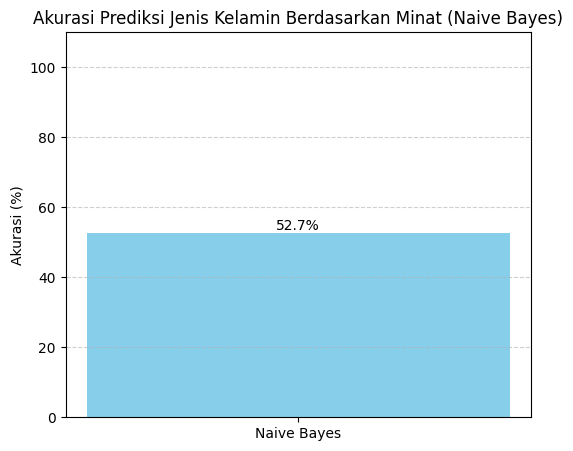

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# 1. Baca file
df = pd.read_csv("Minat-Profesi.csv")

# 2. Ambil fitur dan label
X = df[['Minat 1', 'Minat 2', 'MInat 3']]
y = df['Jenis Kelamin']  # <- fokus prediksi jenis kelamin

# 3. Encode teks ke angka
X = X.apply(LabelEncoder().fit_transform)  # minat
y = LabelEncoder().fit_transform(y)        # pria = 1, wanita = 0

# 4. Buat model
model = GaussianNB()

# 5. Cross-validation
scores = cross_val_score(model, X, y, cv=5)
average_score = scores.mean()

# 6. Cetak hasil
print("Akurasi per fold:", scores)
print(f"Rata-rata akurasi: {average_score:.2f}")

# 7. Visualisasi akurasi
plt.figure(figsize=(6, 5))
bar = plt.bar(['Naive Bayes'], [average_score * 100], color='skyblue')

for b in bar:
    height = b.get_height()
    plt.text(b.get_x() + b.get_width() / 2, height + 1, f"{height:.1f}%", ha='center')

plt.title("Akurasi Prediksi Jenis Kelamin Berdasarkan Minat (Naive Bayes)")
plt.ylabel("Akurasi (%)")
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
